In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)




In [19]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station


In [21]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Print 1st row to see dataset
# first_row = session.query(measurement).first()
# first_row.__dict__


# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

recent_date 

('2017-08-23',)

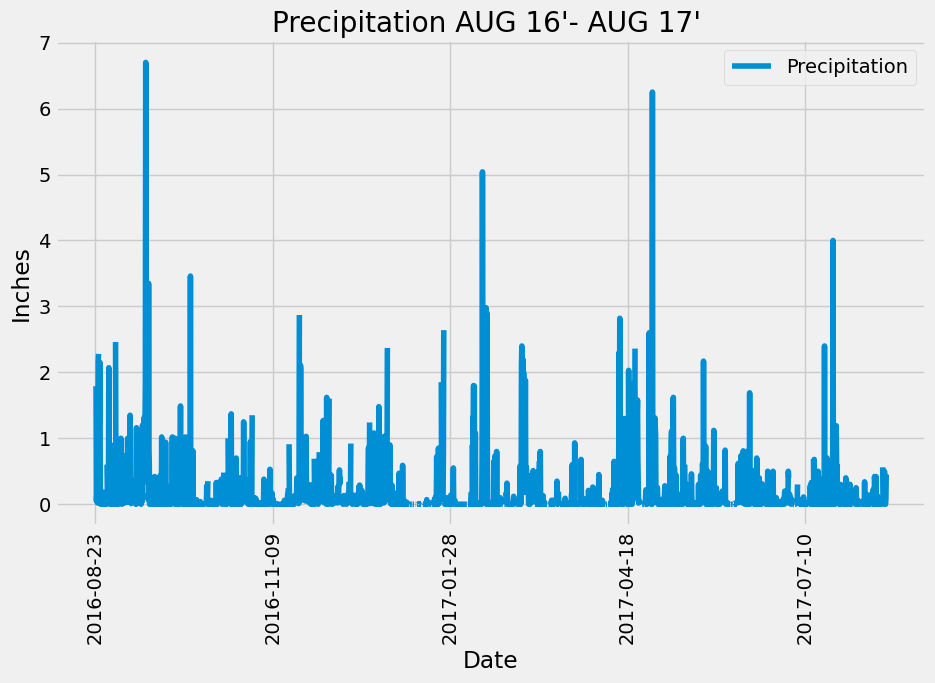

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017, 8,23)

# Calculate the date one year from the last date in data set.
prev_year = most_recent_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
data_prcp = session.query(measurement.date, measurement.prcp)\
            .filter(measurement.date >= prev_year).all()
# there are some NULL in prcp



# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data_prcp, columns=["Date", "Precipitation"])
# print(df)

# Sort the dataframe by date
df_sorted = df.sort_values(by="Date")
# df_sorted maybe need to delet column and Index Date

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x='Date', y='Precipitation', figsize=(10,6))
plt.title("Precipitation AUG 16'- AUG 17' ")
plt.ylabel("Inches")
plt.title
plt.xticks(rotation=90)
plt.show()



In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()


9

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station))\
                                .group_by(measurement.station)\
                                .order_by(func.count(measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281   <-- Most active id
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
            .filter(measurement.station=='USC00519281').all()





[(54.0, 85.0, 71.66378066378067)]

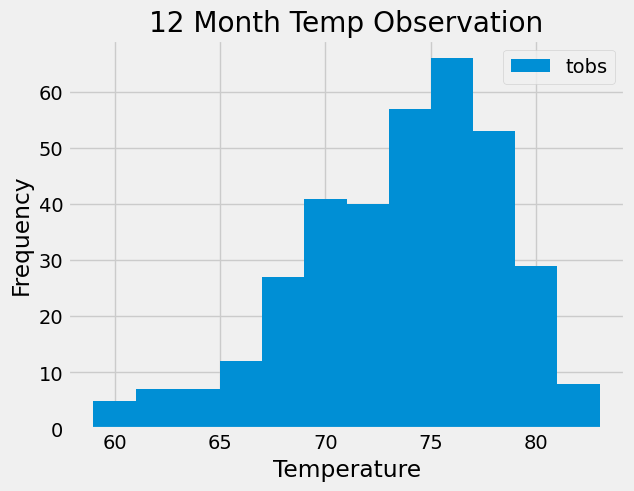

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12_months = session.query(measurement.tobs).filter(measurement.station=='USC00519281')\
                        .filter(measurement.date >='2016-08-23').all()
# last12_months
tobs_data = pd.DataFrame(last12_months,columns=["tobs"])
tobs_data.plot.hist(bins=12)
plt.title("12 Month Temp Observation")
plt.xlabel("Temperature")
plt.show()


# Close Session

In [29]:
# Close Session
session.close()